In [1]:
import miRNET
import miRNET_enrichment
from matplotlib import pyplot as plt
import numpy as np

In [20]:
name = 'miR-375' #miR_name
Targets = miRNET.Targets()
miR_targets = Targets.get_targets(name)
tis_gene_set = miRNET.tissue_selector()

I found a miRNA with name: hsa-miR-375
and  477 unique targets
"Human Protein Atlas"(0) or "GTEx"(1) ? 0
Gene universe is...
0 ----- adipose tissue
1 ----- adrenal gland
2 ----- appendix
3 ----- bone marrow
4 ----- breast
5 ----- bronchus
6 ----- cartilage
7 ----- caudate
8 ----- cerebellum
9 ----- cerebral cortex
10 ----- cervix, uterine
11 ----- choroid plexus
12 ----- colon
13 ----- dorsal raphe
14 ----- duodenum
15 ----- endometrium 1
16 ----- endometrium 2
17 ----- epididymis
18 ----- esophagus
19 ----- eye
20 ----- fallopian tube
21 ----- gallbladder
22 ----- hair
23 ----- heart muscle
24 ----- hippocampus
25 ----- hypothalamus
26 ----- kidney
27 ----- lactating breast
28 ----- liver
29 ----- lung
30 ----- lymph node
31 ----- nan
32 ----- nasopharynx
33 ----- oral mucosa
34 ----- ovary
35 ----- pancreas
36 ----- parathyroid gland
37 ----- pituitary gland
38 ----- placenta
39 ----- prostate
40 ----- rectum
41 ----- retina
42 ----- salivary gland
43 ----- seminal vesicle
44 ----- s

In [21]:
Data = miRNET.BaseData() #Load String db

In [22]:
Regulome = miRNET.Regulome(Data.interactome) #create gene-gene interaction network

In [23]:
Regulome.get_LCC() #get the largest connected component from the network

In [24]:
Regulome.select_nodes(miR_targets) # select the part of LCC containing only the miRNA target genes
Regulome.select_nodes(tis_gene_set) # select the part of LCC containing only the tissue target genes

In [25]:
kne = miRNET.KeyNodesExtractor(Regulome) # creating an object for extracting key nodes and storing their meta information


In [26]:
kne.extraction() #key nodes extraction

dict_keys(['PIK3CA', 'RHOA', 'MAPK3', 'PAFAH1B1', 'CTNNB1', 'MYC', 'PRKCA', 'ERBB2', 'CDC42'])

In [27]:
plt = miRNET.plots(Regulome, kne, name)

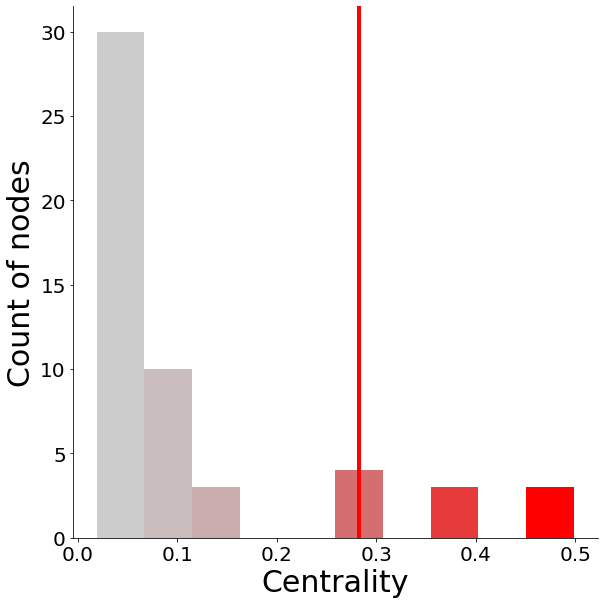

In [28]:
plt.central_distr()

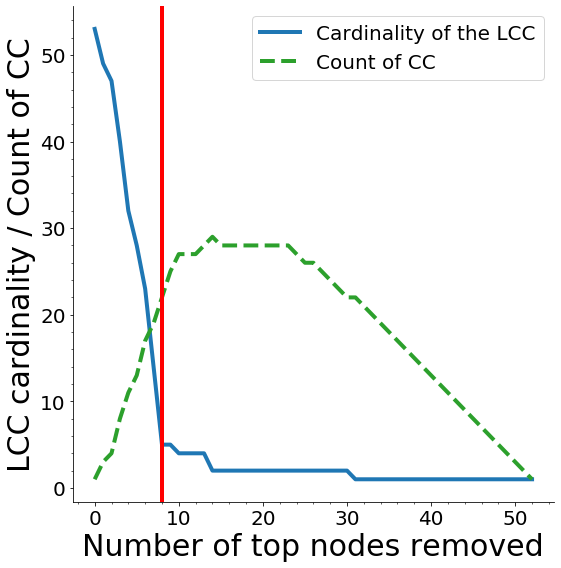

In [29]:
plt.key_nodes_extractor()

In [30]:
# The Cytoscape is needed to execute it

plt.graph_to_cytoscape()

0  network components with less than two nodes have been removed


In [32]:
enrich_res = miRNET_enrichment.reactome_enrichment(kne.key_nodes.keys())

enrich_res = miRNET_enrichment.reac_pars(enrich_res)

G_enrich = miRNET_enrichment.get_net(enrich_res) #граф сигнальных путей

reactome_df = miRNET_enrichment.dendro_reactome_to_pandas(enrich_res, G_enrich)

<Figure size 432x288 with 0 Axes>

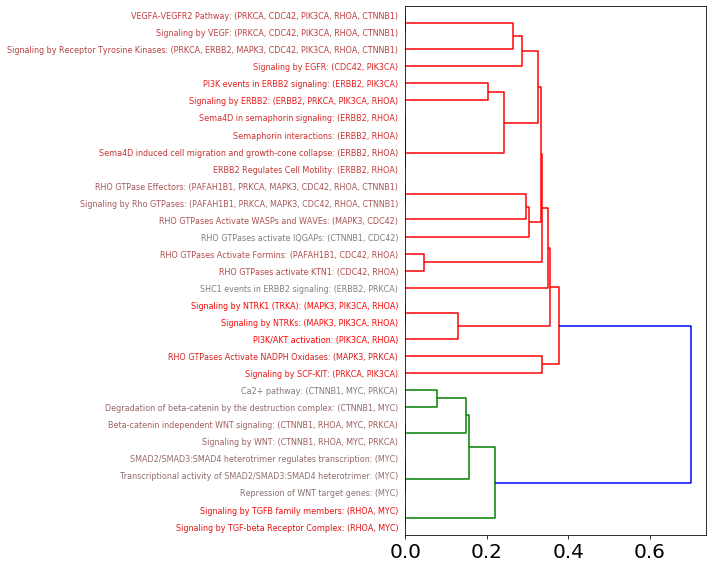

In [33]:
miRNET_enrichment.get_dendro(reactome_df, kne.key_nodes, 'miR21')